In [1]:
%matplotlib inline
import nltk
from nltk import word_tokenize
from urllib2 import urlopen
import pandas as pd
import matplotlib.pyplot as plt

#1. Choose a corpus of interest.

In [2]:
#Download "The Hunger Games" in txt format
url = "https://sites.google.com/site/the74thhungergamesbyced/download-the-hunger-games-trilogy-e-book-txt-file/%281%29%20The%20Hunger%20Games.txt?attredirects=0&d=1"
ebook = urlopen(url).read().decode('utf8')
ebook[0:50]

u'\ufeffThe Hunger Games\r\n\r\n\r\nThe Hunger Games 1by Suzann'

#2. How many total unique words are in the corpus?

In [3]:
token = word_tokenize(ebook)
unique = [x for x in token if x.isalpha()]
unique = [x.lower() for x in unique]
len(set(unique))

7512

#3.Taking the most common words, how many unique words represent half of the total words in the corpus?

In [4]:
frequent = nltk.FreqDist(unique)
common = frequent.most_common(200)
i = 0
half = []
for x in common:
    if i >= len(token)/2:
        break
    else:
        i = i + x[1]
        half.append(x)
len(half)

129

#4.Identify the 200 highest frequency words in the this corpus.

In [5]:
highest = pd.DataFrame(common, columns = ['Word', 'Count'])
highest

,Word,Count
0,the,5651
1,i,3782
2,to,2748
3,and,2419
4,a,2152
5,of,1936
6,my,1632
7,in,1486
8,it,1016
9,me,935


#5. Create a graph that shows the relative frequency of these 200 words.

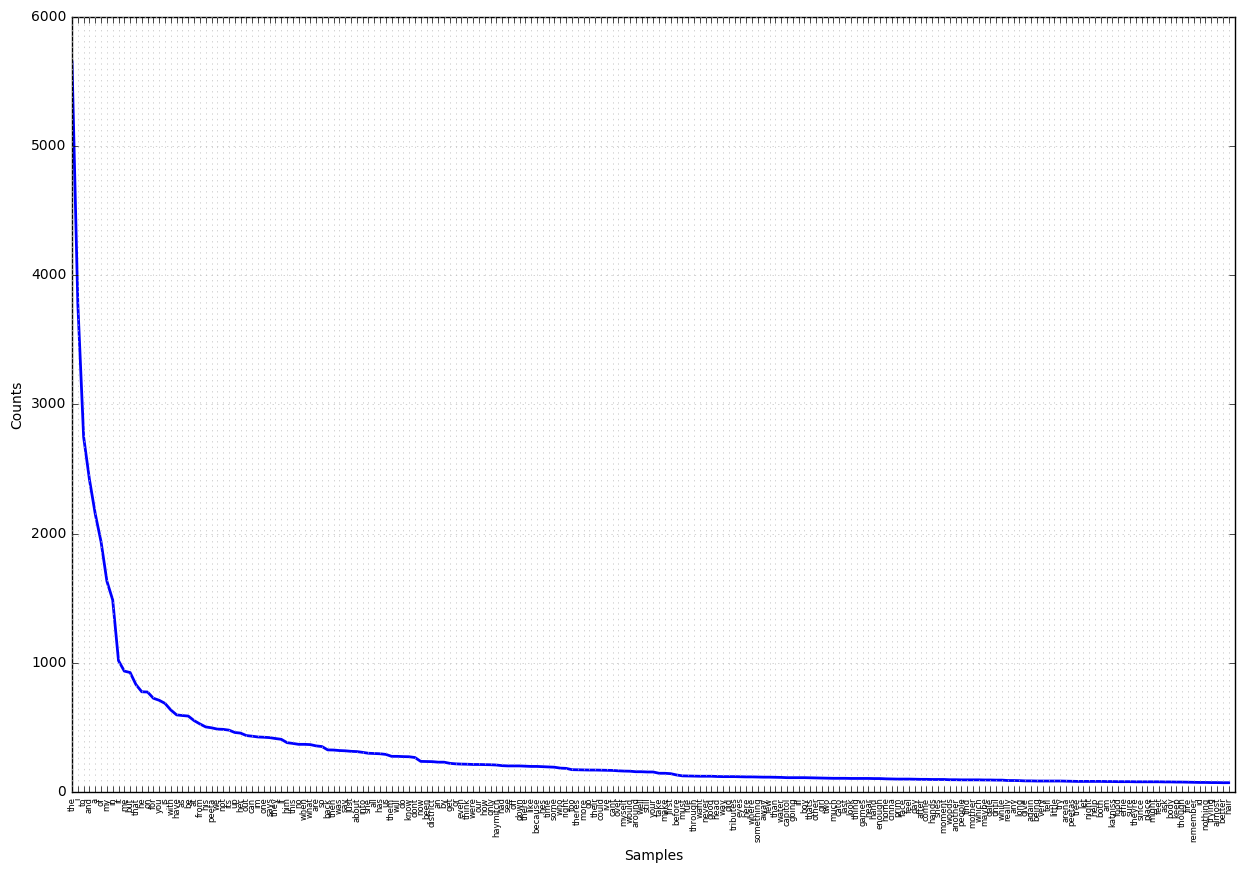

In [6]:
plt.figure(figsize=(15, 10))
plt.rc('xtick', labelsize=6) 
# plot the top 20 tokens
frequent.plot(200)

#6. Does the observed relative frequency of these words follow Zipf's law? Explain.

In [7]:
zipf = frequent.most_common(500)
x = [i+1 for i in range(len(zipf))]
y = [freq for (word,freq) in zipf]

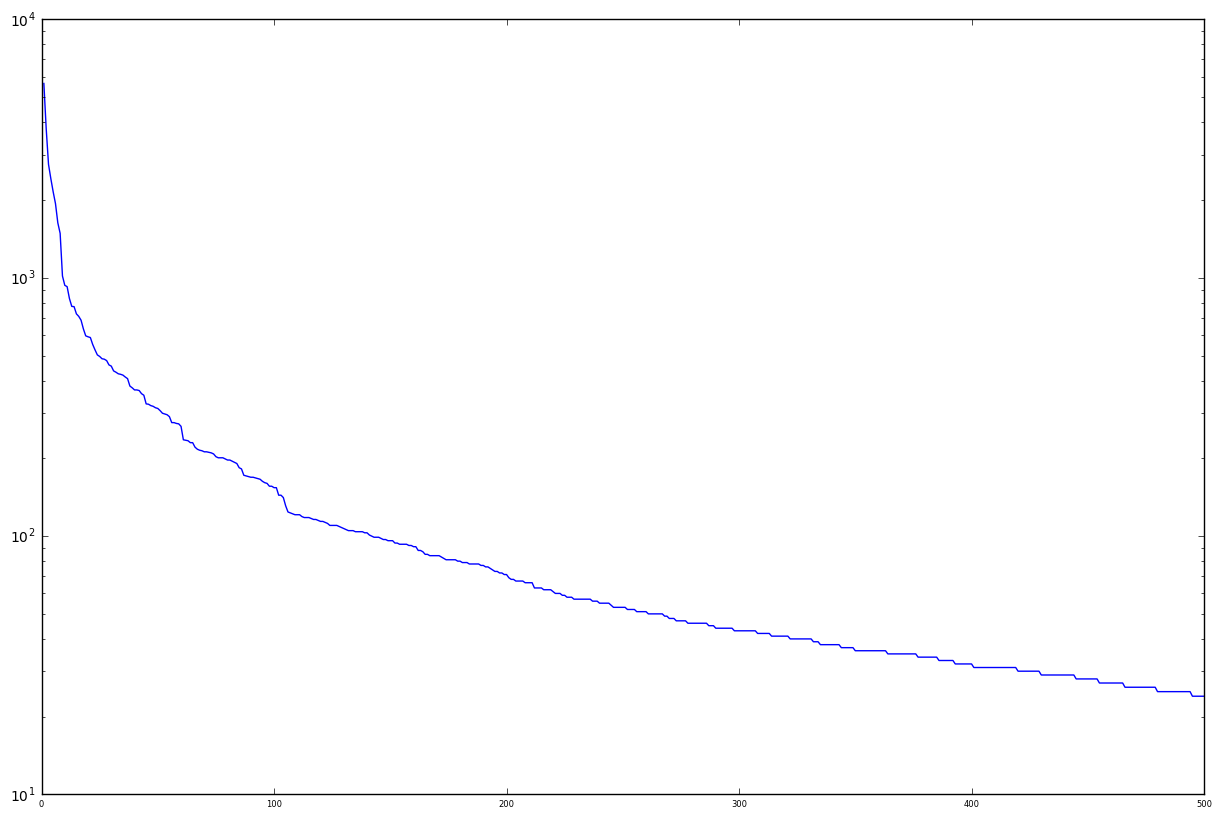

In [8]:
plt.figure(1, figsize=(15,10))
plt.semilogy(x, y)
plt.show()

The observed frequency doesn't seem to follow Zipf's law.  You would expect to see a straight line on this graph, but you see a curved line instead.  If you removed the common words like "the", "and", "a", etc., then the frequency would be more of a straight line.  The author of this book must have used those common words a lot which threw off the distribution.

#7. In what ways do you think the frequency of the words in this corpus differ from "all words in all corpora"?

Based on the graph of the relative frequency, the biggest difference is that common words are used more often than expected.